In [524]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [525]:
import numpy as np
import matplotlib.pyplot as plt


def visualize_classifier(classifier, X, y, title=''):
    # Define the minimum and maximum values for X and Y
    # that will be used in the mesh grid
    min_x, max_x = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0
    min_y, max_y = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0

    # Define the step size to use in plotting the mesh grid 
    mesh_step_size = 0.01

    # Define the mesh grid of X and Y values
    x_vals, y_vals = np.meshgrid(np.arange(min_x, max_x, mesh_step_size), np.arange(min_y, max_y, mesh_step_size))

    # Run the classifier on the mesh grid
    output = classifier.predict(np.c_[x_vals.ravel(), y_vals.ravel()])

    # Reshape the output array
    output = output.reshape(x_vals.shape)

    # Create a plot
    plt.figure()

    # Specify the title
    plt.title(title)

    # Choose a color scheme for the plot 
    plt.pcolormesh(x_vals, y_vals, output, cmap=plt.cm.gray)

    # Overlay the training points on the plot 
    plt.scatter(X[:, 0], X[:, 1], c=y, s=75, edgecolors='black', linewidth=1, cmap=plt.cm.Paired)

    # Specify the boundaries of the plot
    plt.xlim(x_vals.min(), x_vals.max())
    plt.ylim(y_vals.min(), y_vals.max())

    # Specify the ticks on the X and Y axes
    plt.xticks((np.arange(int(X[:, 0].min() - 1), int(X[:, 0].max() + 1), 1.0)))
    plt.yticks((np.arange(int(X[:, 1].min() - 1), int(X[:, 1].max() + 1), 1.0)))

    plt.show()

In [526]:
# Load input data
input_file = '../aiwp-data/data_decision_trees.txt'
data = np.loadtxt(input_file, delimiter=',')
data.shape

(360, 3)

In [527]:
X, y = data[:, :-1], data[:, -1]
X.shape, type(X)

((360, 2), numpy.ndarray)

In [528]:
# # bonus
# np.random.shuffle(y)

In [529]:
# Separate input data into two classes based on labels
class_0 = np.array(X[y==0])
class_1 = np.array(X[y==1])

In [530]:
class_0.shape, type(class_0), class_1.shape

((180, 2), numpy.ndarray, (180, 2))

/tmp/ipykernel_60984/3606243706.py:3: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(class_0[:, 0], class_0[:, 1], s=75, facecolors='black',


Text(0.5, 1.0, 'Input data')

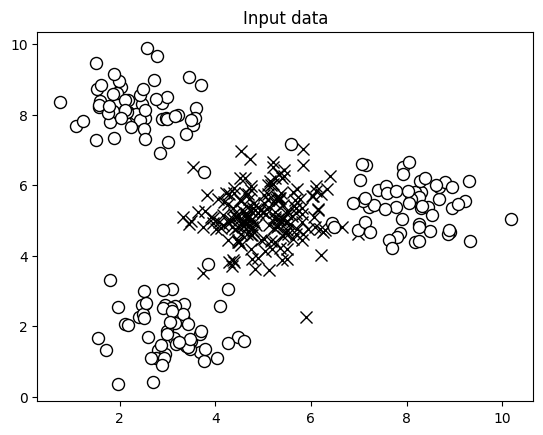

In [531]:
# Visualize input data
plt.figure()
plt.scatter(class_0[:, 0], class_0[:, 1], s=75, facecolors='black', 
        edgecolors='black', linewidth=1, marker='x')
plt.scatter(class_1[:, 0], class_1[:, 1], s=75, facecolors='white', 
        edgecolors='black', linewidth=1, marker='o')
plt.title('Input data')

In [541]:
size_, rand, rand_state, max_depth_ = 0.25, 5, 0, 4    # 0.25, 5, 0, 4   | 0.2, 8, 3, 5

In [542]:
# # Split data into training and testing datasets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size_, random_state=rand)

In [543]:
X_train.shape, X_test.shape

((270, 2), (90, 2))

In [544]:
# Decision Trees classifier 
params = {'random_state': rand_state, 'max_depth': max_depth_}
classifier = DecisionTreeClassifier(**params)

In [545]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

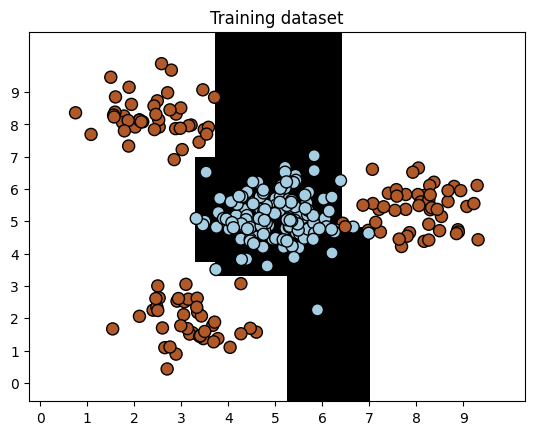

In [546]:
visualize_classifier(classifier, X_train, y_train, 'Training dataset')

In [547]:
y_test_pred = classifier.predict(X_test)
# y_test_pred
y_test_pred.shape

(90,)

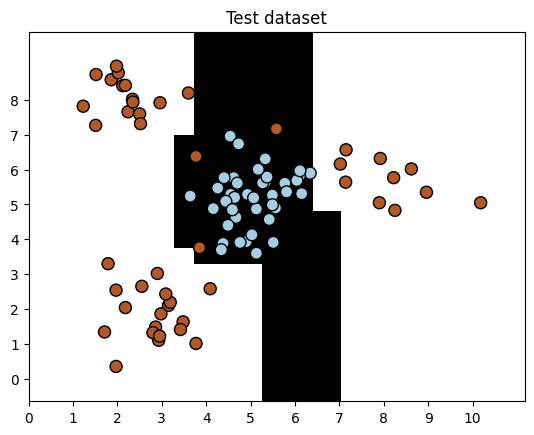

In [548]:
visualize_classifier(classifier, X_test, y_test, 'Test dataset')

In [549]:
# Evaluate classifier performance
class_names = ['Class-0', 'Class-1']
print("\nClassifier performance on training dataset\n")
print(classification_report(y_train, classifier.predict(X_train), target_names=class_names))
print("#"*40 + "\n")
print("\nClassifier performance on test dataset\n")
print(classification_report(y_test, y_test_pred, target_names=class_names))


Classifier performance on training dataset

              precision    recall  f1-score   support

     Class-0       0.99      1.00      1.00       137
     Class-1       1.00      0.99      1.00       133

    accuracy                           1.00       270
   macro avg       1.00      1.00      1.00       270
weighted avg       1.00      1.00      1.00       270

########################################


Classifier performance on test dataset

              precision    recall  f1-score   support

     Class-0       0.93      1.00      0.97        43
     Class-1       1.00      0.94      0.97        47

    accuracy                           0.97        90
   macro avg       0.97      0.97      0.97        90
weighted avg       0.97      0.97      0.97        90

